<a href="https://colab.research.google.com/github/Justraim/Jupyter-Notebook-Project/blob/main/Transaction%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 22seven Insights.xlsx to 22seven Insights.xlsx


In [ ]:
df = pd.read_excel("22seven Insights.xlsx")

In [ ]:
df.head()

,Transaction ID,Customer ID,Merchant,Transaction Description,Transaction Date,Transaction Month,Amount
0,1,1,Checkers,Checkers Hyper Toka 4**55,2020-10-19 11:00:00,2020-10-01,2644.39
1,2,2,Checkers,(Effec *2021) Freshx Mooi River Potch 6614,2021-06-30 09:00:00,2021-06-01,202.45
2,3,3,Pick n Pay,Cheque Card Purchase Pnp Crp Queen 4Xxx *81,2021-06-30 09:00:00,2021-06-01,130.75
3,4,4,Pick n Pay,Cheque Card Purchase Pnp Crp Rand 5Xxx *31,2021-06-30 09:00:00,2021-06-01,720.32
4,5,5,Pick n Pay,Pnp Fran Westville ...,2021-06-30 09:00:00,2021-06-01,33.99


In [ ]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69710 entries, 0 to 69709
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Transaction ID           69710 non-null  int64         
 1   Customer ID              69710 non-null  int64         
 2   Merchant                 69710 non-null  object        
 3   Transaction Description  69664 non-null  object        
 4   Transaction Date         69710 non-null  datetime64[ns]
 5   Transaction Month        69710 non-null  datetime64[ns]
 6   Amount                   69710 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 3.7+ MB
None


In [ ]:
# Display summary statistics
print(df.describe())

       Transaction ID   Customer ID        Amount
count    69710.000000  69710.000000  69710.000000
mean     34854.905925    342.058872    536.527316
std      20124.105629    229.972048   1170.254731
min          1.000000      1.000000      0.010000
25%      17427.250000    155.000000    112.450000
50%      34854.500000    317.000000    284.845000
75%      52282.750000    508.000000    635.275000
max      69710.000000    889.000000  70000.000000


In [ ]:
# Check for missing values
print(df.isnull().sum())

Transaction ID              0
Customer ID                 0
Merchant                    0
Transaction Description    46
Transaction Date            0
Transaction Month           0
Amount                      0
dtype: int64


In [ ]:
df['date'] = pd.to_datetime(df['Transaction Month'])

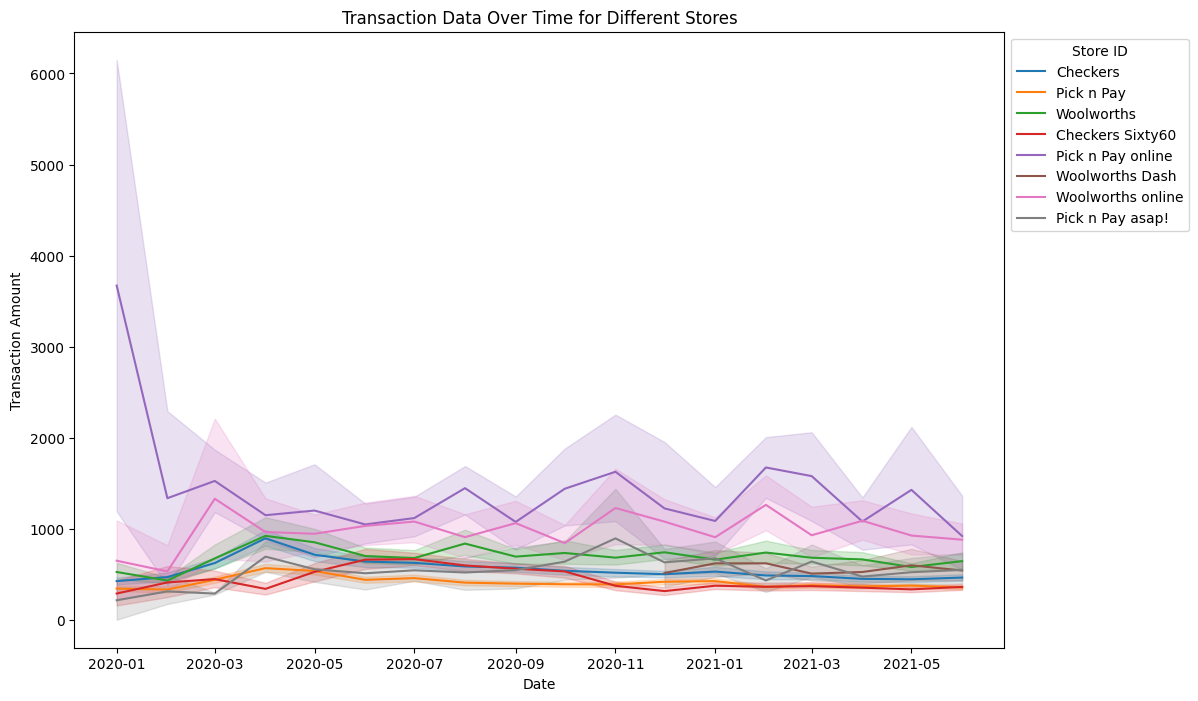

In [ ]:
# Plot transaction data over time for different stores

plt.figure(figsize=(12, 8))
sns.lineplot(x=df['date'], y=df['Amount'], hue=df['Merchant'], data=df)
plt.title('Transaction Data Over Time for Different Stores')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.legend(title='Store ID', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
pivot = df.pivot_table(index =['Merchant'],
                       values =['Amount'],
                       aggfunc ='sum')
print(pivot)

                        Amount
Merchant                      
Checkers            8083865.66
Checkers Sixty60    1360661.76
Pick n Pay          9899094.01
Pick n Pay asap!     231902.11
Pick n Pay online    282474.97
Woolworths         16936905.26
Woolworths Dash       90944.05
Woolworths online    515471.38


In [ ]:
# Select features and target variable
features = df['Merchant']  # Add more features as needed
target = df['Amount']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
df["Customer ID"].mode()

0    91
Name: Customer ID, dtype: int64

In [ ]:
# Extract month and year into separate columns
df['Month'] = df["date"].dt.month
df['Year'] = df["date"].dt.year

In [ ]:
# Filter the data based on the specified time period
start_year = 2020
end_year = 2021


filtered_df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]

In [ ]:
top_entries = df["Customer ID"].value_counts().head(10)
top_entries

91     482
859    477
7      462
61     445
6      436
174    421
275    416
15     380
47     373
294    369
Name: Customer ID, dtype: int64

In [ ]:
# Group by the specified column and aggregate the spending amount
agg_spending = filtered_df.groupby("Customer ID")["Amount"].sum()
agg_spending

Customer ID
1      108700.43
2        9975.43
3       64562.89
4        6966.05
5       47503.30
         ...    
885     15371.28
886      3878.99
887     10149.58
888      1393.74
889     58220.02
Name: Amount, Length: 889, dtype: float64

In [ ]:
# Filter the aggregated spending for the top 10 entries
top_entries_spending = agg_spending[top_entries.index]

**How Much the Top 10 Customers By Usages Spent**

In [ ]:
# Display the result
print("Top 10 Most Frequent Entries and Their Aggregated Spending:")
print(top_entries_spending)

Top 10 Most Frequent Entries and Their Aggregated Spending:
91     130099.12
859    142467.20
7       45116.60
61     207157.57
6       73317.46
174    769087.31
275    215394.43
15     246265.36
47     175192.71
294    151183.49
Name: Amount, dtype: float64


In [ ]:
# Return a Pivot Table
pivot = df.pivot_table(index =['Customer ID', 'Year'],
                       values =['Amount'], aggfunc ='sum')
print (pivot)

                    Amount
Customer ID Year          
1           2020  74724.07
            2021  33976.36
2           2020   3192.45
            2021   6782.98
3           2020  33222.18
...                    ...
885         2020  15371.28
886         2020   3878.99
887         2020  10149.58
888         2020   1393.74
889         2020  58220.02

[1597 rows x 1 columns]


In [ ]:
top_entries = df['Customer ID'].value_counts().head(10).index

In [ ]:
filtered_df = df[df['Customer ID'].isin(top_entries)]
filtered_df

,Transaction ID,Customer ID,Merchant,Transaction Description,Transaction Date,Transaction Month,Amount,date,Month,Year
5,6,6,Pick n Pay,Pnp Fam York Street Kenilworth,2021-06-30 09:00:00,2021-06-01,238.57,2021-06-01,6,2021
6,7,7,Pick n Pay,Cheque Card Purchase Pnp Family Th 4Xxx *16,2021-06-30 09:00:00,2021-06-01,725.49,2021-06-01,6,2021
7,8,7,Pick n Pay,Cheque Card Purchase Pnp Family Th 4Xxx *16,2021-06-30 09:00:00,2021-06-01,16.99,2021-06-01,6,2021
15,16,15,Pick n Pay,Pnp Express Stellenbos Stellenbosch,2021-06-30 09:00:00,2021-06-01,140.40,2021-06-01,6,2021
46,47,6,Checkers,Checkers York Street George,2021-06-30 09:00:00,2021-06-01,6.89,2021-06-01,6,2021
...,...,...,...,...,...,...,...,...,...,...
69649,69650,294,Woolworths,Woolworths Hermanus 4**84,2020-01-01 10:00:00,2020-01-01,267.43,2020-01-01,1,2020
69660,69661,15,Woolworths,Woolworths South Downs Vanderbijlpar,2020-01-01 10:00:00,2020-01-01,1070.90,2020-01-01,1,2020
69698,69699,294,Woolworths,Woolworths Hermanus 4**84,2020-01-01 10:00:00,2020-01-01,59.00,2020-01-01,1,2020
69703,69704,294,Checkers,Checkers Hermanus 4**84,2020-01-01 10:00:00,2020-01-01,249.98,2020-01-01,1,2020


from matplotlib import pyplot as plt
filtered_df['Transaction ID'].plot(kind='hist', bins=20, title='Transaction ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
filtered_df['Customer ID'].plot(kind='hist', bins=20, title='Customer ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
filtered_df['Amount'].plot(kind='hist', bins=20, title='Amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
filtered_df['Month'].plot(kind='hist', bins=20, title='Month')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
filtered_df.groupby('Merchant').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
filtered_df.plot(kind='scatter', x='Transaction ID', y='Customer ID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
filtered_df.plot(kind='scatter', x='Customer ID', y='Amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
filtered_df.plot(kind='scatter', x='Amount', y='Month', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
filtered_df.plot(kind='scatter', x='Month', y='Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Transaction Date']
  ys = series['Customer ID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = filtered_df.sort_values('Transaction Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Merchant')):
  _plot_series(series, series_name, i)
  fig.legend(title='Merchant', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Transaction Date')
_ = plt.ylabel('Customer ID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Transaction Date']
  ys = series['Amount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = filtered_df.sort_values('Transaction Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Merchant')):
  _plot_series(series, series_name, i)
  fig.legend(title='Merchant', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Transaction Date')
_ = plt.ylabel('Amount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Transaction Date']
  ys = series['Month']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = filtered_df.sort_values('Transaction Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Merchant')):
  _plot_series(series, series_name, i)
  fig.legend(title='Merchant', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Transaction Date')
_ = plt.ylabel('Month')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Transaction Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Transaction Date'}, axis=1)
              .sort_values('Transaction Date', ascending=True))
  xs = counted['Transaction Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = filtered_df.sort_values('Transaction Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Merchant')):
  _plot_series(series, series_name, i)
  fig.legend(title='Merchant', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Transaction Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
filtered_df['Transaction ID'].plot(kind='line', figsize=(8, 4), title='Transaction ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
filtered_df['Customer ID'].plot(kind='line', figsize=(8, 4), title='Customer ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
filtered_df['Amount'].plot(kind='line', figsize=(8, 4), title='Amount')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
filtered_df['Month'].plot(kind='line', figsize=(8, 4), title='Month')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(filtered_df['Merchant'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(filtered_df, x='Transaction ID', y='Merchant', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(filtered_df['Merchant'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(filtered_df, x='Customer ID', y='Merchant', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(filtered_df['Merchant'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(filtered_df, x='Amount', y='Merchant', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(filtered_df['Merchant'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(filtered_df, x='Month', y='Merchant', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

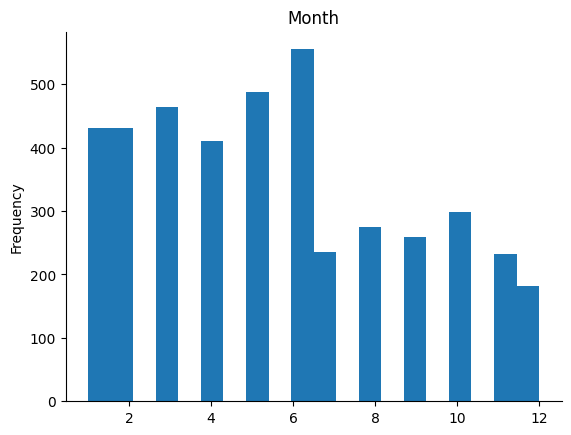

In [ ]:
from matplotlib import pyplot as plt
filtered_df['Month'].plot(kind='hist', bins=20, title='Month')
plt.gca().spines[['top', 'right',]].set_visible(False)